# **Exploratory Data Analysis (EDA) – Modul 4**
**Dataset:** Netflix TV Shows and Movies (titles_clean.csv)  
**Nama:** Mochammad Delvin Farhan Akbar  

Pada tugas ini dilakukan eksplorasi data untuk menjawab pertanyaan replikasi serta pertanyaan baru yang diajukan dari modul sebelumnya (modul 2). Analisis dilakukan dengan statistik deskriptif dan visualisasi data untuk menemukan pola dan insight awal.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("titles_clean.csv")
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1,NaN,6.6,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,UNKNOWN,150,"['war', 'action']","['GB', 'US']",0,tt0061578,7.7,72662.0,20.398,7.600


## Pertanyaan Replikasi 1
**Berapa jumlah film dibandingkan TV show di dataset ini?**

Hasil analisis menunjukkan bahwa jumlah **Movie** jauh lebih banyak dibandingkan dengan **TV Show**. Hal ini sejalan dengan strategi konten Netflix yang lebih banyak merilis film dibandingkan serial.

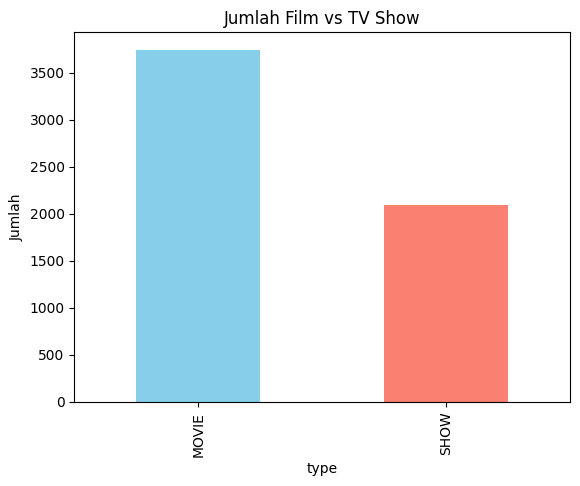

,count
type,
MOVIE,3744
SHOW,2092


In [2]:
df['type'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Jumlah Film vs TV Show")
plt.ylabel("Jumlah")
plt.show()

df['type'].value_counts()

## Pertanyaan Replikasi 2  
**Tahun berapa paling banyak film atau TV show dirilis?**  

Distribusi rilis konten memperlihatkan peningkatan signifikan pada **periode 2015 keatas**, yang menandakan ekspansi besar-besaran Netflix dalam menghadirkan konten baru. Tahun puncak produksi adalah tahun dengan jumlah rilis terbanyak, yaitu pada tahun 2019.  

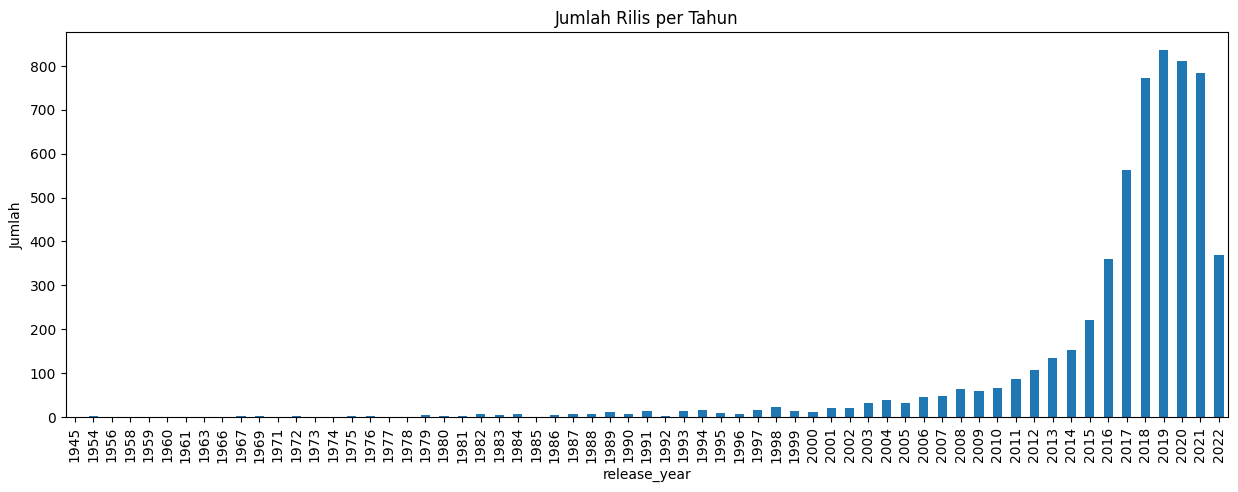

(np.int64(2019), 835)

In [3]:
release_counts = df['release_year'].value_counts().sort_index()
release_counts.plot(kind='bar', figsize=(15,5))
plt.title("Jumlah Rilis per Tahun")
plt.ylabel("Jumlah")
plt.show()

release_counts.idxmax(), release_counts.max()

## Pertanyaan Replikasi 3  
**Negara mana yang paling banyak memproduksi film/show?**  

Negara dengan produksi terbanyak adalah **Amerika Serikat**, diikuti oleh India, Inggris, dan beberapa negara lain. Dominasi AS menggambarkan posisi Netflix yang berbasis di sana, sekaligus menggambarkan industri hiburan Hollywood.  

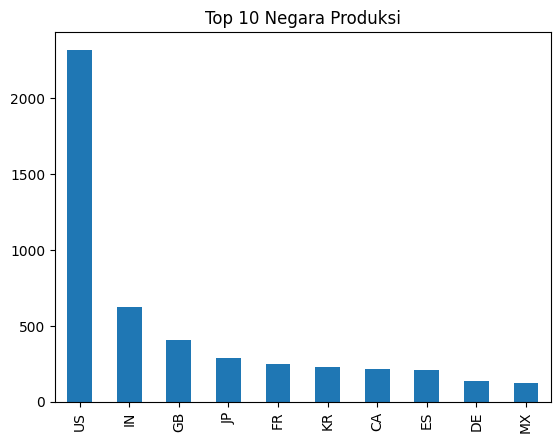

In [4]:
from collections import Counter
import ast

countries = []
for val in df['production_countries'].dropna():
    if isinstance(val, str):
        countries.extend(ast.literal_eval(val))

country_counts = Counter(countries)
pd.Series(country_counts).sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Negara Produksi")
plt.show()

## Pertanyaan Replikasi 4  
**Genre apa yang paling sering muncul dalam dataset ini?**  

Genre yang paling sering muncul adalah **Drama**, diikuti oleh Comedy, Thriller, dan Action. Dominasi drama menunjukkan preferensi pasar global terhadap cerita berbasis konflik emosional dan sosial. Genre ini umum karena memiliki basis penonton yang luas di berbagai negara.

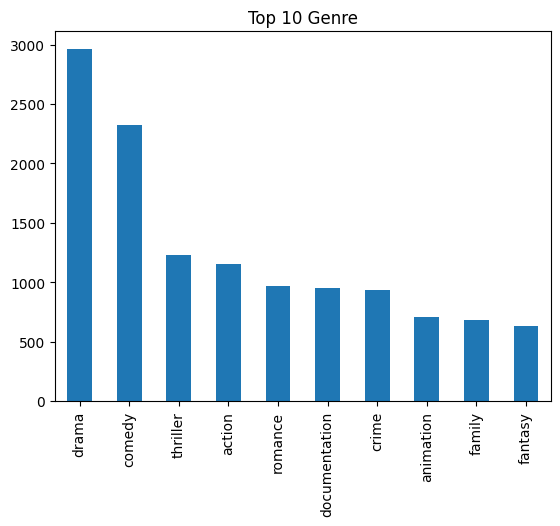

In [5]:
genres = []
for val in df['genres'].dropna():
    if isinstance(val, str):
        genres.extend(ast.literal_eval(val))

genre_counts = Counter(genres)
pd.Series(genre_counts).sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Genre")
plt.show()

## Pertanyaan Replikasi 5  
**Berapa rata-rata skor IMDb dari seluruh film?**  

Rata-rata skor IMDb film berada di sekitar **6,2**. Nilai ini menunjukkan kualitas mayoritas film di Netflix berada pada level cukup baik, meskipun hanya sebagian kecil yang meraih skor tinggi di atas 8.

In [8]:
avg_imdb_movie = df[df['type']=="MOVIE"]['imdb_score'].mean()
print("Rata-rata: ", avg_imdb_movie)

Rata-rata:  6.2764690170940165


## Pertanyaan Baru 1  
**Apakah film dengan rating usia R/TV-MA memiliki skor IMDb lebih tinggi dibandingkan rating usia lain?**  

Berdasarkan distribusi skor IMDb untuk setiap kategori rating usia, terlihat bahwa rata-rata skor IMDb relatif mirip di semua kategori rating (berada di sekitar 6–7). Rating **R** dan **TV-MA** tidak menunjukkan skor IMDb yang lebih tinggi secara konsisten dibandingkan rating usia lain. Variasi (penyebaran) skor juga cukup lebar pada setiap kategori, dengan adanya beberapa outlier baik bernilai tinggi maupun rendah. Ini berarti rating usia tidak terlalu memengaruhi tinggi rendahnya skor IMDb, sehingga kualitasnya sangat bergantung pada konten, bukan semata-mata pada kategori usia.

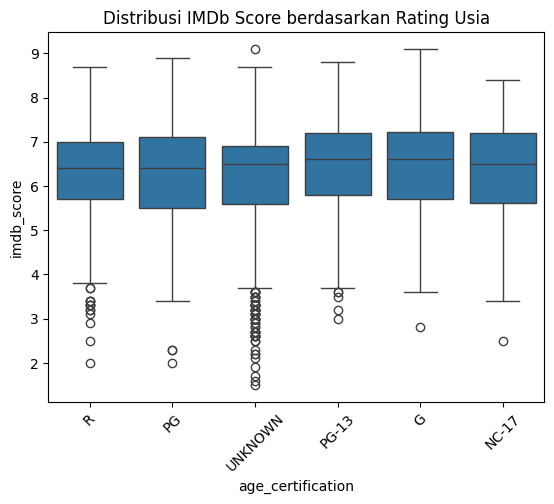

,imdb_score
age_certification,
TV-14,7.180597
TV-MA,6.995216
TV-PG,6.892021
TV-Y7,6.819167
TV-Y,6.551402
PG-13,6.431929
G,6.417742
TV-G,6.346835
R,6.307014


In [14]:
sns.boxplot(data=df[df['type']=="MOVIE"], x='age_certification', y='imdb_score')
plt.xticks(rotation=45)
plt.title("Distribusi IMDb Score berdasarkan Rating Usia")
plt.show()

df.groupby('age_certification')['imdb_score'].mean().sort_values(ascending=False).head(10)

## Pertanyaan Baru 2  
**Apakah durasi film berhubungan dengan skor IMDb?**  

Scatterplot memperlihatkan mayoritas film memiliki durasi antara **80–120 menit**, dengan skor IMDb yang bervariasi di kisaran 5–8. Tidak terlihat adanya pola yang jelas bahwa film dengan durasi lebih panjang memiliki skor IMDb lebih tinggi. Beberapa film berdurasi sangat panjang (>180 menit) maupun sangat pendek (<60 menit) tetap bisa mendapat skor tinggi, meskipun jumlahnya relatif sedikit. Ini berarti, durasi film **tidak memiliki korelasi kuat** terhadap skor IMDb.

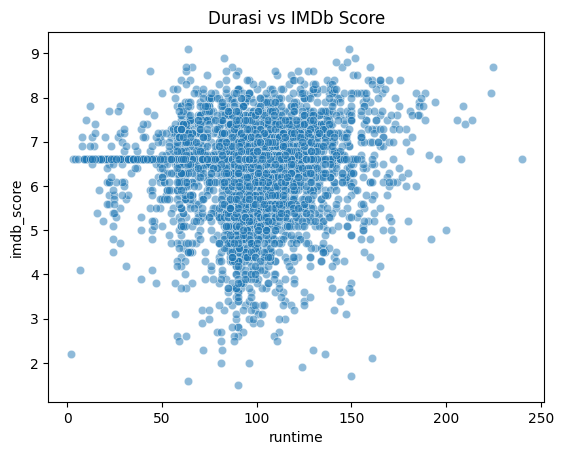

,runtime,imdb_score
runtime,1.000000,0.071055
imdb_score,0.071055,1.000000


In [10]:
movies = df[df['type']=="MOVIE"]
sns.scatterplot(data=movies, x='runtime', y='imdb_score', alpha=0.5)
plt.title("Durasi vs IMDb Score")
plt.show()

movies[['runtime','imdb_score']].corr()

## Pertanyaan Baru 3  
**Apakah popularitas film/TV show di TMDB berhubungan dengan skor IMDb?**  

Hubungan antara popularitas TMDB dan skor IMDb tidak menunjukkan korelasi linear yang kuat. Dengan kata lain, popularitas tinggi tidak secara otomatis menjamin skor yang sangat tinggi, dan sebaliknya, skor tinggi tidak selalu berarti film tersebut sangat populer.

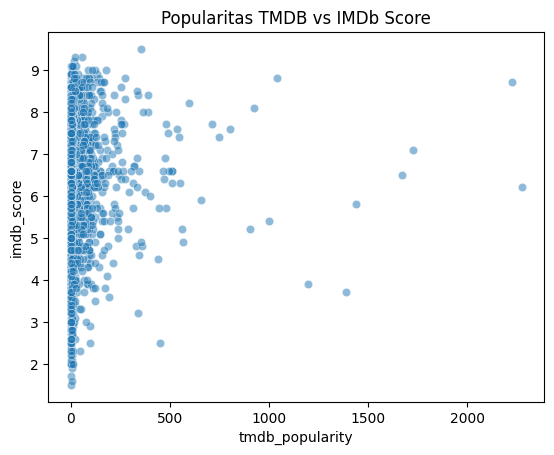

,tmdb_popularity,imdb_score
tmdb_popularity,1.000000,0.016792
imdb_score,0.016792,1.000000


In [11]:
sns.scatterplot(data=df, x='tmdb_popularity', y='imdb_score', alpha=0.5)
plt.title("Popularitas TMDB vs IMDb Score")
plt.show()

df[['tmdb_popularity','imdb_score']].corr()

## Pertanyaan Baru 4  
**Negara mana yang paling banyak menghasilkan film dengan IMDb score di atas 8?**    

Berdasarkan hasil analisis, negara dengan produksi film berkualitas tinggi (IMDb > 8) justru didominasi oleh **India (IN)**, disusul oleh **Amerika Serikat (US)** dan **Inggris (GB)**.   Hal ini menarik karena memperlihatkan bahwa meskipun US memproduksi lebih banyak film secara keseluruhan, India memiliki proporsi lebih besar film dengan skor tinggi. Ini bisa mencerminkan tingginya kualitas produksi tertentu dalam industri perfilman India, khususnya Bollywood, yang diakui secara internasional.  


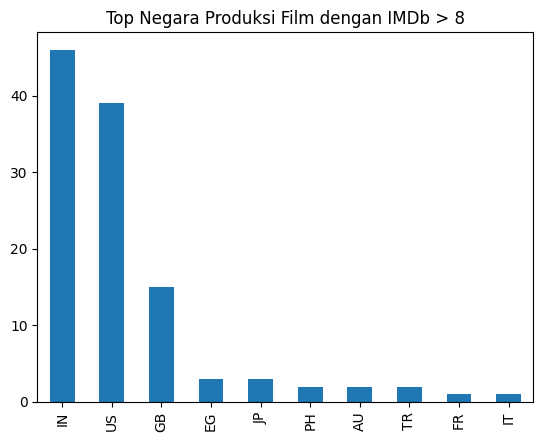

In [12]:
high_score = df[(df['type']=="MOVIE") & (df['imdb_score']>8)]
countries_high = []
for val in high_score['production_countries'].dropna():
    if isinstance(val, str):
        countries_high.extend(ast.literal_eval(val))

pd.Series(Counter(countries_high)).sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top Negara Produksi Film dengan IMDb > 8")
plt.show()

## Pertanyaan Baru 5  
**Bagaimana tren kualitas film dari tahun 1950–2020 jika dilihat dari rata-rata skor IMDb?**  

Line chart menunjukkan pada periode **1960–1970an**, terlihat beberapa lonjakan skor yang mencapai **lebih dari 8**, menandakan adanya film-film dengan kualitas tinggi pada masa tersebut. Namun, memasuki era **1980–1990an**, tren skor lebih fluktuatif dengan beberapa titik penurunan cukup tajam, bahkan ada yang mendekati **skor 5**. Setelah tahun **2000**, skor rata-rata cenderung **stabil di kisaran 6.5–7**, menunjukkan kualitas film modern lebih konsisten meskipun tidak setinggi beberapa dekade sebelumnya. Secara umum, dapat disimpulkan bahwa **kualitas film cenderung menurun perlahan sejak tahun 1970an hingga 2020**, meskipun tetap ada variasi dan beberapa puncak kualitas.  


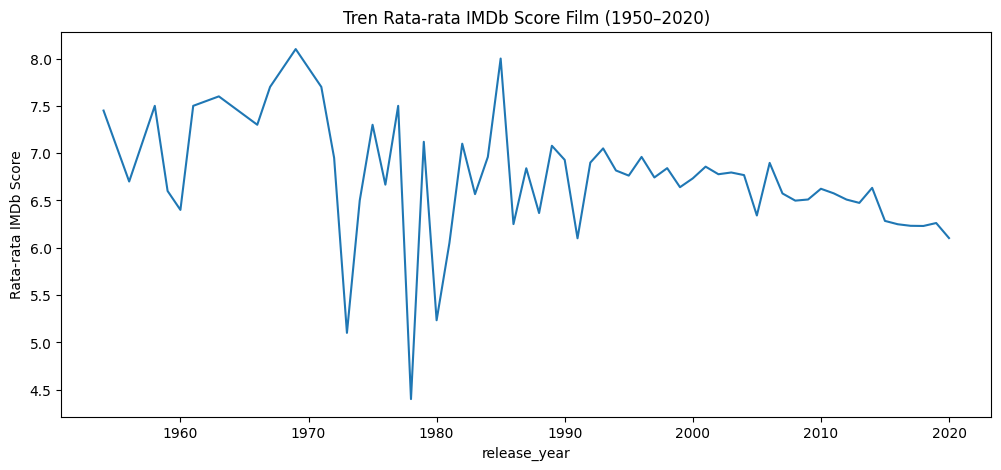

In [13]:
trend = df[(df['type']=="MOVIE") & (df['release_year']>=1950) & (df['release_year']<=2020)]
trend.groupby('release_year')['imdb_score'].mean().plot(kind='line', figsize=(12,5))
plt.title("Tren Rata-rata IMDb Score Film (1950–2020)")
plt.ylabel("Rata-rata IMDb Score")
plt.show()

### **Kesimpulan**

Berdasarkan analisis data pada dataset Netflix, dapat ditarik beberapa kesimpulan utama. Platform ini secara kuantitas lebih banyak merilis film (Movie) dibandingkan acara TV (Show), dengan puncak produksi konten terjadi pada tahun 2019. Secara geografis, Amerika Serikat adalah produsen konten terbanyak, sementara genre yang paling mendominasi adalah drama.

Dari segi kualitas, rata-rata skor IMDb untuk film berada di angka 6,2. Analisis lebih lanjut menunjukkan tidak adanya korelasi kuat antara skor IMDb dengan faktor lain seperti rating usia, durasi film, ataupun popularitas di TMDB. Menariknya, meskipun Amerika Serikat memproduksi film terbanyak secara keseluruhan, India merupakan negara yang paling banyak menghasilkan film berkualitas tinggi dengan skor IMDb di atas 8. Tren kualitas film dari tahun 1950 hingga 2020 menunjukkan adanya fluktuasi, dengan skor rata-rata yang cenderung stabil di kisaran 6.5-7 setelah tahun 2000, mengindikasikan kualitas yang lebih konsisten pada era modern meskipun tidak setinggi puncak di beberapa dekade sebelumnya.